In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
import numpy as np
TrainingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEC.npy')
TrainingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEC.npy')
testingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEC.npy')
testingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEC.npy')

TrainingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEO.npy')
TrainingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEO.npy')
testingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEO.npy')
testingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEO.npy')

In [4]:
print(TrainingEC.shape)
print(TrainingEClabel.shape)
print(testingEC.shape)
print(testingEClabel.shape)

(1512, 500, 19)
(1512, 2)
(378, 500, 19)
(378, 2)


In [5]:
# prepare dataset for 1DCNN model
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]

In [7]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Activation, Dropout, GRU
import pandas as pd
from keras.optimizers import SGD
import math

#%EEG dataset for depression assesment computation

# Control Dataset
import os
import scipy
from scipy import io, signal
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pywt
#from __future__ import print_function
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [9]:
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=False, input_shape=(TrainingEC.shape[1],TrainingEC.shape[2]), activation='tanh'))
#print(modelGRU.get_input_at())
modelGRU.add(Dropout(0.2))
print(modelGRU)
# The output layer
modelGRU.add(Dense(units=2))
modelGRU.add(Activation('sigmoid'))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                10650     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 10,752
Trainable params: 10,752
Non-trainable params: 0
_________________________________________________________________


In [11]:
for layer in modelGRU.layers:
  print(layer.get_config(),layer.get_weights())

{'name': 'gru', 'trainable': True, 'batch_input_shape': (None, 500, 19), 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2, 'reset_after': True} [array([[ 0.18550292, -0.14749652, -0.1505531 , ...,  0.13407642,
        -0.10766592,  0.14834449],
       [-0.08989338, -0.10949861,  0.01824765, ..., -0.01890878,
        

In [15]:
for layer in modelGRU.layers:
  print(layer.name)

weights=modelGRU.layers[0].get_weights()[0]
baises=modelGRU.layers[0].get_weights()[1]
print(weights.shape)
print(baises.shape)

weights=modelGRU.layers[2].get_weights()[0]
baises=modelGRU.layers[2].get_weights()[1]
print(weights.shape)
print(baises.shape)

gru
dropout
dense
activation
(19, 150)
(50, 150)
(50, 2)
(2,)


In [18]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

modelGRU.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 400
EPOCHS = 50

history = modelGRU.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 124ms/step - loss: 0.4951 - acc: 0.7833 - val_loss: 0.6047 - val_acc: 0.6601
Epoch 2/50
4/4 [==============================] - 0s 47ms/step - loss: 0.4829 - acc: 0.7866 - val_loss: 0.6007 - val_acc: 0.6601
Epoch 3/50
4/4 [==============================] - 0s 44ms/step - loss: 0.4715 - acc: 0.7916 - val_loss: 0.5975 - val_acc: 0.6700
Epoch 4/50
4/4 [==============================] - 0s 47ms/step - loss: 0.4698 - acc: 0.7990 - val_loss: 0.5956 - val_acc: 0.6766
Epoch 5/50
4/4 [==============================] - 0s 46ms/step - loss: 0.4734 - acc: 0.7899 - val_loss: 0.5951 - val_acc: 0.6832


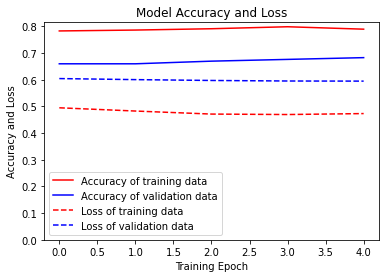

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [20]:
#%accuracy on test data
#y_testEC = np_utils.to_categorical(testingEC,2)

score = modelGRU.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 0s 12ms/step - loss: 0.5399 - acc: 0.7434

Accuracy on test data: 0.74

Loss on test data: 0.54


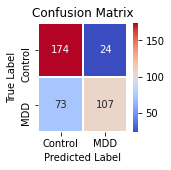

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       198
           1       0.82      0.59      0.69       180

    accuracy                           0.74       378
   macro avg       0.76      0.74      0.74       378
weighted avg       0.76      0.74      0.74       378



In [21]:
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
y_pred_test = modelGRU.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [24]:
# multiple GRU layers model
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(TrainingEC.shape[1],TrainingEC.shape[2]), activation='tanh'))
#print(modelGRU.get_input_at())
modelGRU.add(Dropout(0.2))
print(modelGRU)
# Second GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(TrainingEC.shape[1],TrainingEC.shape[2]), activation='tanh'))
modelGRU.add(Dropout(0.2))
# Third GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(TrainingEC.shape[1],TrainingEC.shape[2]), activation='tanh'))
modelGRU.add(Dropout(0.2))
# Fourth GRU layer
modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dropout(0.2))
# The output layer
modelGRU.add(Dense(units=2))
modelGRU.add(Activation('sigmoid'))
modelGRU.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 500, 50)           10650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 500, 50)           15300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 500, 50)           15300     
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 50)               

In [26]:
# multiple GRU layers model
# The GRU architecture
modelGRU = Sequential()
# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(TrainingEC.shape[1],TrainingEC.shape[2]), activation='tanh'))
#print(modelGRU.get_input_at())
modelGRU.add(Dropout(0.2))
print(modelGRU)
# Second GRU layer
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(Dropout(0.2))
# Third GRU layer
modelGRU.add(GRU(units=50, return_sequences=True))
modelGRU.add(Dropout(0.2))
# Fourth GRU layer
modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dropout(0.2))
# The output layer
modelGRU.add(Dense(units=2))
modelGRU.add(Activation('sigmoid'))
modelGRU.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 500, 50)           10650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_7 (GRU)                  (None, 500, 50)           15300     
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 500, 50)           15300     
_________________________________________________________________
dropout_8 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
gru_9 (GRU)                  (None, 50)               

In [27]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_modellstmmulti.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

modelGRU.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 400
EPOCHS = 50
history = modelGRU.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 372ms/step - loss: 0.6920 - acc: 0.5567 - val_loss: 0.6777 - val_acc: 0.6238
Epoch 2/50
4/4 [==============================] - 1s 156ms/step - loss: 0.6720 - acc: 0.6046 - val_loss: 0.6684 - val_acc: 0.6007
Epoch 3/50
4/4 [==============================] - 1s 158ms/step - loss: 0.6539 - acc: 0.6452 - val_loss: 0.6554 - val_acc: 0.6304
Epoch 4/50
4/4 [==============================] - 1s 156ms/step - loss: 0.6323 - acc: 0.6567 - val_loss: 0.6358 - val_acc: 0.6634
Epoch 5/50
4/4 [==============================] - 1s 161ms/step - loss: 0.6168 - acc: 0.6725 - val_loss: 0.6241 - val_acc: 0.6700
Epoch 6/50
4/4 [==============================] - 1s 159ms/step - loss: 0.5938 - acc: 0.7064 - val_loss: 0.6229 - val_acc: 0.6799
Epoch 7/50
4/4 [==============================] - 1s 145ms/step - loss: 0.5820 - acc: 0.7080 - val_loss: 0.6256 - val_acc: 0.6931
Epoch 8/50
4/4 [==============================] - 1s 144ms/step - loss: 0.5598 - acc: 0.71

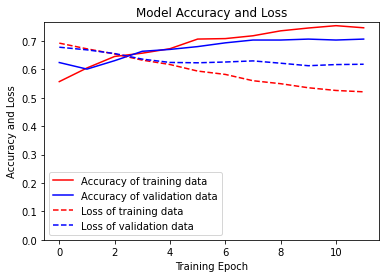

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [29]:
#%accuracy on test data
#y_testEC = np_utils.to_categorical(y_testEC,2)

score = modelGRU.evaluate(testingEC, testingEClabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 0s 34ms/step - loss: 0.5574 - acc: 0.7302

Accuracy on test data: 0.73

Loss on test data: 0.56


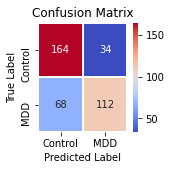

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       198
           1       0.77      0.62      0.69       180

    accuracy                           0.73       378
   macro avg       0.74      0.73      0.72       378
weighted avg       0.74      0.73      0.73       378



In [30]:
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


y_pred_test = modelGRU.predict(testingEC)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEClabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))